# Dask Integration with pyclespranto

This demo is to illustrate a proper setup of GPU workers with [Dask](https://docs.dask.org/en/stable/) client API.

pyclespranto has a very good integration with Dask. However GPU often has less VRAM than host (CPU) side. It is recommended to setup a separate GPU worker to manage pyclespranto operations.

In [1]:
# Header import with specific computing device. Here we select a GPU for the opencl operations.
import pyclesperanto as cle
cle.select_device("TX")

(OpenCL) NVIDIA GeForce RTX 2080 SUPER (OpenCL 3.0 CUDA)
	Type: GPU
	Compute Units: 48
	Global Memory Size: 8358 MB
	Maximum Object Size: 2089 MB

## Dask Crash Course

To begin with, we create a big random Dask array. This suppose to be capable for a single task run on the 8GB GPU

In [2]:
from dask import array
# dask_array = array.random.random((450, 1024,1024))
dask_array = array.random.random((128, 1024, 1024))
dask_array

dask.array<random_sample, shape=(128, 1024, 1024), dtype=float64, chunksize=(128, 362, 362), chunktype=numpy.ndarray>

Perform Gaussian blur with dask_array on GPU

array([[[0.6322751 , 0.9764233 , 0.02210738, ..., 0.2546918 ,
         0.39294246, 0.06914719],
        [0.81884813, 0.29160252, 0.21518388, ..., 0.66692543,
         0.14679468, 0.43963847],
        [0.28819126, 0.46305507, 0.8447681 , ..., 0.7024151 ,
         0.99924135, 0.9567516 ],
        ...,
        [0.9031701 , 0.997099  , 0.29577392, ..., 0.5317295 ,
         0.9624462 , 0.22413656],
        [0.30357525, 0.52200073, 0.1711579 , ..., 0.21161939,
         0.03903352, 0.5654177 ],
        [0.95479745, 0.52755237, 0.24332666, ..., 0.6736193 ,
         0.646431  , 0.70316976]],

       [[0.13158111, 0.06420241, 0.14566642, ..., 0.08668324,
         0.72202516, 0.851997  ],
        [0.06028764, 0.06033651, 0.6941229 , ..., 0.8106852 ,
         0.89362293, 0.6134618 ],
        [0.44572046, 0.95259887, 0.17523693, ..., 0.16820006,
         0.883819  , 0.54109806],
        ...,
        [0.5405301 , 0.6983967 , 0.6818369 , ..., 0.03184349,
         0.6695253 , 0.09419159],
        [0.6338404 , 0.48298585, 0.0968762 , ..., 0.19275975,
         0.75127727, 0.15391783],
        [0.50980604, 0.6572158 , 0.45872432, ..., 0.73024374,
         0.6160447 , 0.56290233]],

       [[0.29812008, 0.4373793 , 0.7256668 , ..., 0.4657484 ,
         0.59093225, 0.24446027],
        [0.6855835 , 0.08743829, 0.11596601, ..., 0.08039787,
         0.43729293, 0.6559296 ],
        [0.9013186 , 0.77489763, 0.83187634, ..., 0.03239936,
         0.3619057 , 0.4729315 ],
        ...,
        [0.19085716, 0.9687354 , 0.99826527, ..., 0.52384734,
         0.55643594, 0.15901652],
        [0.3796351 , 0.26537597, 0.66808665, ..., 0.8204733 ,
         0.83727336, 0.94185936],
        [0.22859508, 0.7333635 , 0.8252971 , ..., 0.02752325,
         0.51811093, 0.38023478]],

       ...,

       [[0.6227939 , 0.34196153, 0.8196858 , ..., 0.20184354,
         0.89890313, 0.2641907 ],
        [0.7604826 , 0.09593638, 0.46801922, ..., 0.5176327 ,
         0.9653189 , 0.6837257 ],
        [0.05079602, 0.75677556, 0.5301015 , ..., 0.19797702,
         0.78322077, 0.5110554 ],
        ...,
        [0.23437306, 0.37671626, 0.43081415, ..., 0.74671555,
         0.8847052 , 0.69863987],
        [0.5336728 , 0.2720322 , 0.7009119 , ..., 0.6819776 ,
         0.25525188, 0.12975124],
        [0.85669   , 0.46451327, 0.8745257 , ..., 0.090319  ,
         0.28647354, 0.07780577]],

       [[0.99442166, 0.19095416, 0.51425344, ..., 0.55064833,
         0.7739097 , 0.79285985],
        [0.11654935, 0.25972772, 0.78135526, ..., 0.10879102,
         0.99563676, 0.5536797 ],
        [0.8975491 , 0.76804686, 0.60507137, ..., 0.33928448,
         0.59143746, 0.06090416],
        ...,
        [0.21008612, 0.03648086, 0.5444392 , ..., 0.08978703,
         0.13393828, 0.23979574],
        [0.33950472, 0.76644146, 0.19989872, ..., 0.35209885,
         0.5569663 , 0.09782652],
        [0.36559284, 0.60654664, 0.56677246, ..., 0.24592772,
         0.74982625, 0.7255949 ]],

       [[0.04676534, 0.50549453, 0.66614443, ..., 0.11173382,
         0.80285215, 0.10259614],
        [0.9112002 , 0.80010825, 0.38630226, ..., 0.4549864 ,
         0.40110716, 0.92163223],
        [0.4707726 , 0.9169136 , 0.9282289 , ..., 0.50464946,
         0.28551626, 0.19246645],
        ...,
        [0.06915943, 0.8435979 , 0.27798367, ..., 0.34250093,
         0.03379593, 0.44709814],
        [0.39013466, 0.6135264 , 0.03761981, ..., 0.048676  ,
         0.26981384, 0.6741355 ],
        [0.04927783, 0.3461525 , 0.8572918 , ..., 0.80871284,
         0.76742613, 0.38585603]]], dtype=float32, mtype=buffer)
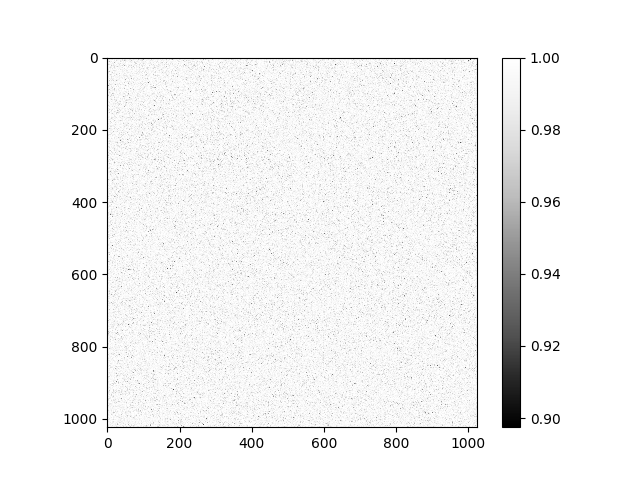
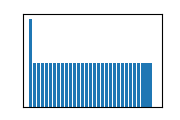

In [3]:
blurred_device = cle.gaussian_blur(dask_array)
blurred_device

Manage the GPU array with Dask

In [4]:
blurred_device_dask = array.from_array(blurred_device)
blurred_device_dask

dask.array<array, shape=(128, 1024, 1024), dtype=float32, chunksize=(128, 512, 512), chunktype=numpy.ndarray>

Data pulling from device to host need to be operated manually. Collect result back to host before releasing GPU memory.

In [5]:
blurred_host = array.from_array(cle.pull(blurred_device)) # pull gpu array back to host then manage by dask
blurred_host

dask.array<array, shape=(128, 1024, 1024), dtype=float32, chunksize=(128, 512, 512), chunktype=numpy.ndarray>

Release GPU memory. Carefully using the buffer release, it must come with the variable deletion to avoid kernel crash due to invalid memory pointer.

In [6]:
# good practice to remove the variables for releasing the gpu memory
del blurred_device 
del blurred_device_dask

## Dask Resource Management with pyclespranto

You may have multiple GPU devices and constrained by GPU memories. Here we utilize the power of Dask as a job scheduler with pyclespranto. 

A good walkthrough will be the [Dask Worker Resources](https://distributed.dask.org/en/stable/resources.html) page. In this demo we will create workers to handle CPU tasks and GPU task.

In [7]:
import dask
from dask.distributed import Client, Scheduler, Worker, Nanny, SpecCluster
import multiprocessing
import psutil

client = Client(timeout="120")  # Set a 60-second timeout

### Prepare Dask Cluster

To build a heterogenous cluster, we need to use Dask [SpecCluster](https://github.com/dask/distributed/blob/main/distributed/deploy/spec.py).

On our workstation we have 16 CPU cores, 1 GPU and 128GB RAM. We want to distribute the resources evenly with the specification:

| worker | nthreads | memory | GPU |
|:------:|:--------:|:------:|:---:|
|  cpu-0 |     4    |  32GB  |  0  |
|  cpu-1 |     4    |  32GB  |  0  |
|  cpu-2 |     4    |  32GB  |  0  |
|  gpu-0 |     4    |  32GB  |  1  |

In [8]:
# gather device info
cpu_count = multiprocessing.cpu_count()
memory_count = psutil.virtual_memory().total
print("CPU count:", cpu_count)
print("System memory:",memory_count)

CPU count: 16
System memory: 100912672768


In [9]:
specs = {
    "cpu":{
        "scale":3,
        "resources":{
        }
    },
    "gpu":{
        "scale":1,
        "resources":{
            "GPU":1
        }
    }
}

worker_count = 0
for v in specs.values():
    worker_count += v["scale"]

nthreads = cpu_count//worker_count
memory_limit = int(memory_count*0.9)//worker_count # set to use 90% of the system memory to avoid crashing

print("number of workers:", worker_count)
print("threads per worker:", nthreads)
print("memory limit per worker:", round(memory_limit/(1024*1024*1024),2), "GB")

number of workers: 4
threads per worker: 4
memory limit per worker: 21.15 GB


In [10]:
workers = {}

for k, v in specs.items():
    for i in range(v["scale"]):
        workers["{}-{}".format(k,i)] = {
            "cls":Nanny,
            "options":{
                "nthreads": nthreads,
                "resources":v["resources"],
                "memory_limit": memory_limit
                }
                }

Manually config the scheduler. Then create the cluster and manage by Dask client.

In [11]:
scheduler = {'cls': Scheduler, 'options': {"dashboard_address": ':8787'}}
cluster = SpecCluster(scheduler=scheduler, workers=workers)
client = Client(cluster)
client

/home/stephane/Libraries/miniconda3/envs/build8/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40917 instead
  warnings.warn(
2023-12-01 16:35:06,169 - distributed.worker - INFO -       Start worker at:     tcp://10.21.63.7:46077
2023-12-01 16:35:06,169 - distributed.worker - INFO -          Listening to:     tcp://10.21.63.7:46077
2023-12-01 16:35:06,169 - distributed.worker - INFO -           Worker name:                      cpu-1
2023-12-01 16:35:06,169 - distributed.worker - INFO -          dashboard at:           10.21.63.7:42227
2023-12-01 16:35:06,169 - distributed.worker - INFO - Waiting to connect to:     tcp://10.21.63.7:36425
2023-12-01 16:35:06,169 - distributed.worker - INFO - -------------------------------------------------
2023-12-01 16:35:06,169 - distributed.worker - INFO -               Threads:                          4
2023-12-01 16:35:06,1

<Client: 'tcp://10.21.63.7:36425' processes=4 threads=16, memory=84.58 GiB>

### Design Compute Graph using Dask Delayed

For a full GPU computation cycle, GPU memory should be released after the process. Unlike cupy integration with Dask, we need to manage the GPU memory for pyclespranto manually for best performance.

In [12]:
def cle_gaussian_blur(image):
    blurred_device = cle.gaussian_blur(image)
    blurred_host = array.from_array(cle.pull(blurred_device))

    # memory clean 
    del blurred_device

    # variable with automatically removed at the end of function scope
    return blurred_host

We only have one GPU worker. That means the large image can only work in sequential, but if your device get multiple GPUs this suppose can be automatically handle by Dask.

To test the functionality we create a list of Dask futures with the `cle_gaussian_blur` function.

In [13]:
futures = []
for i in range(4):
    future = dask.delayed(cle_gaussian_blur)(dask_array)
    futures.append(future)

Let's have a look at the Dask compute graph.

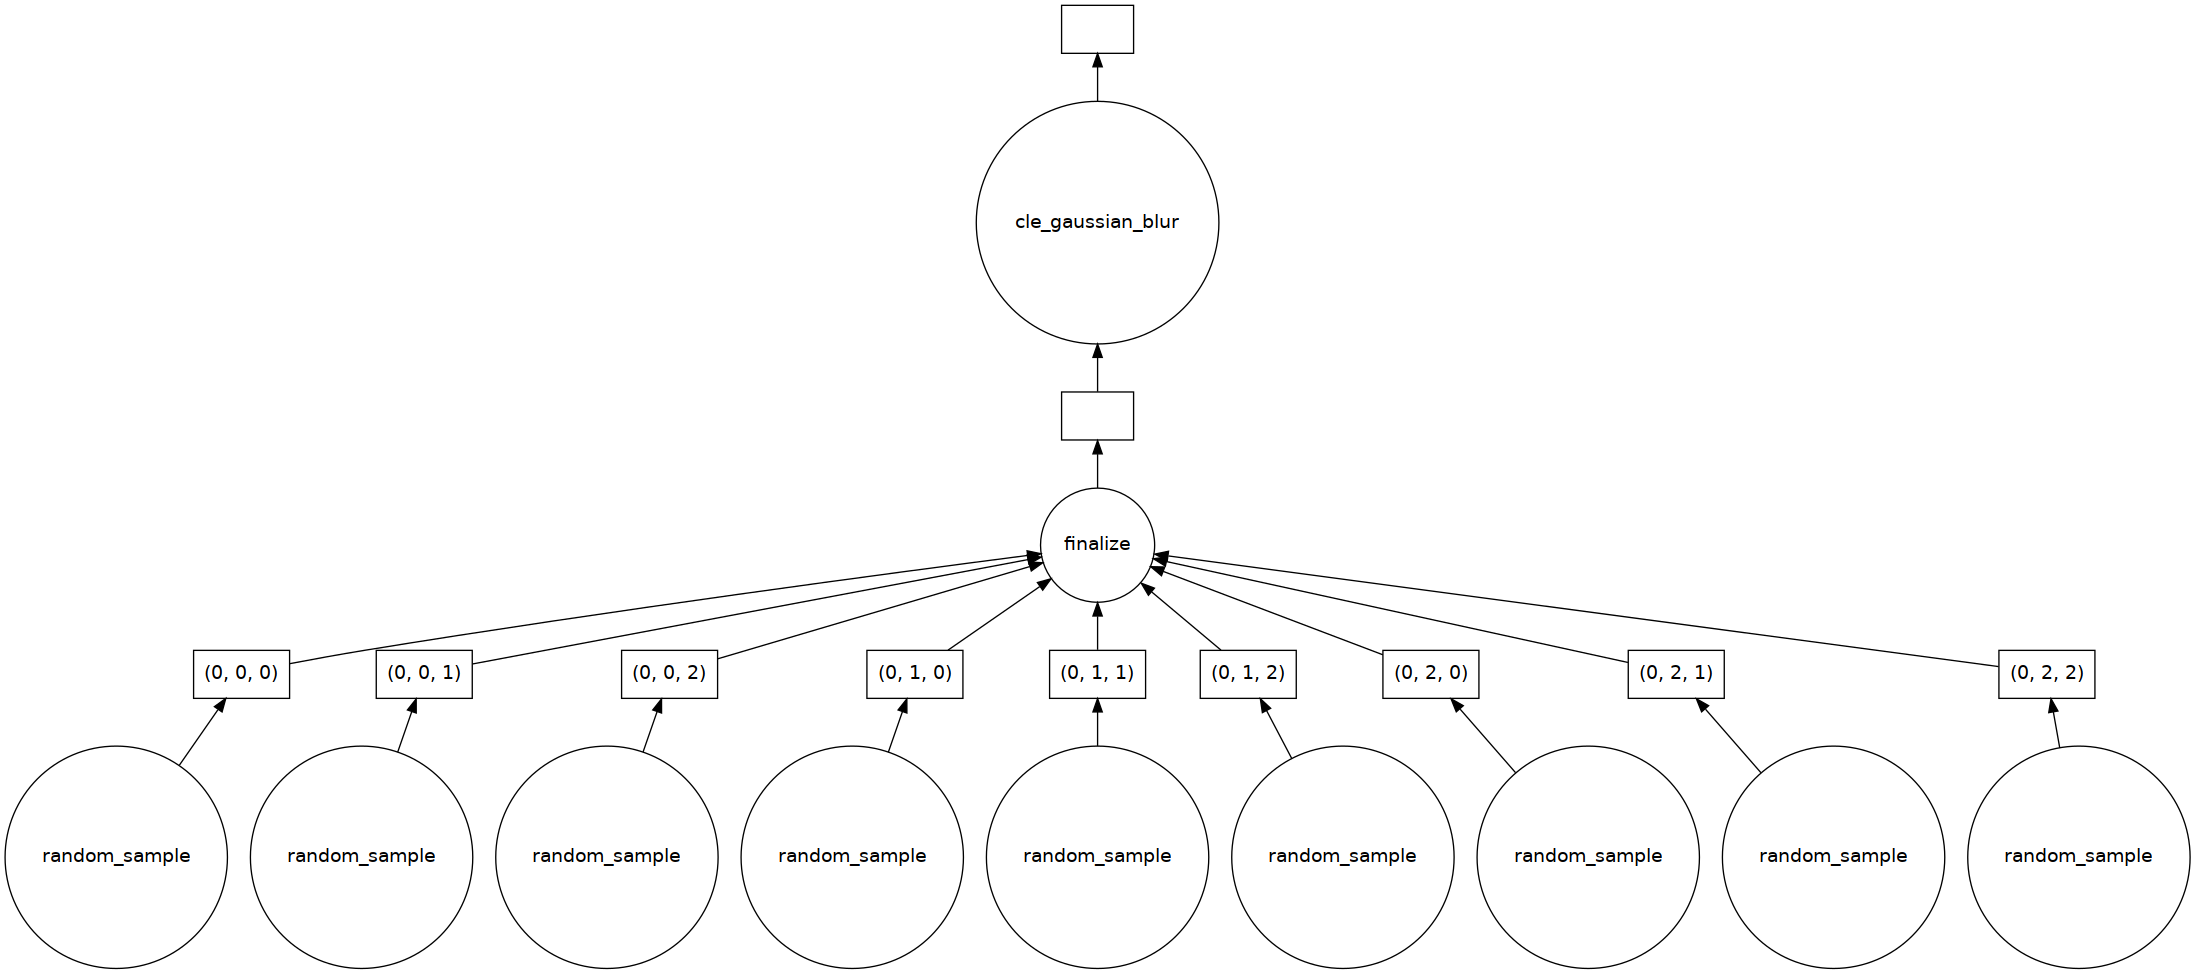

In [14]:
futures[0].visualize()

In [15]:
# specify the worker for the compute process
with dask.annotate(resources={'GPU': 1}):
    res = dask.compute(*futures)

2023-12-01 16:35:17,438 - distributed.core - INFO - Event loop was unresponsive in Worker for 5.07s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


In [16]:
res[0]

dask.array<array, shape=(128, 1024, 1024), dtype=float32, chunksize=(128, 512, 512), chunktype=numpy.ndarray>